## Team 2

Mikko Kettunen, Niklas Koro, Sami Tanhua, Jake Pärssinen

In [235]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from pylab import rcParams
import time

In [236]:
data = pd.read_csv('drone_delivery_v1.csv')
df = pd.DataFrame(data)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
df

,clientid;x;y
0,1;622.7715723;164.8576227
1,2;416.3572979;630.1936343
2,3;292.7350197;567.3332306
3,4;737.2112881;166.2256759
4,5;540.4753747;682.912298
5,6;535.4694924;318.4396612
6,7;640.3800497;870.8332213
7,8;235.7720749;359.0482026
8,9;481.8968836;661.491838
9,10;730.0327891;312.1778169


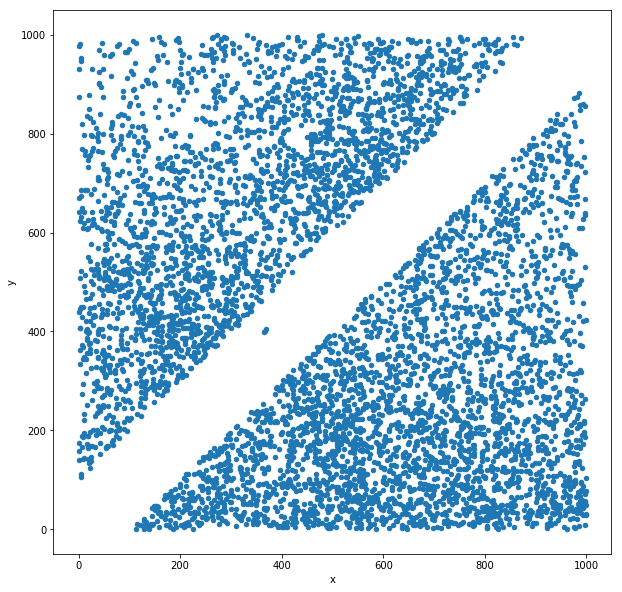

In [237]:
rcParams['figure.figsize'] = 10, 10  # Change figure size
df[['a','b']] = df['clientid;x;y'].str.split(";", n=1, expand=True,) # Extract the ID from the column
df[['x','y']] = df['b'].str.split(";", n=1, expand=True,) # Split the column in half to get the x and y coordinates

convert_dict = {'x': float,
               'y': float} # Change all objects to float
df = df.astype(convert_dict)
df.plot.scatter(x='x', y='y');

In [238]:

from sklearn.cluster import KMeans
df2 = df[['x','y']] # Define the new dataframe


Wall time: 256 ms


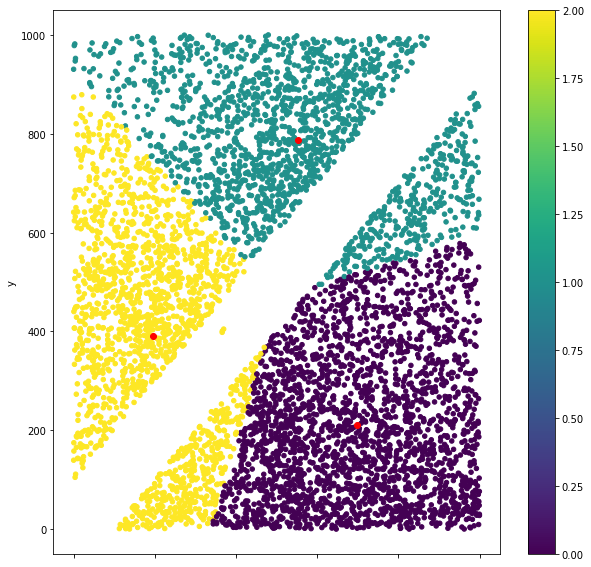

In [239]:
%%time
#Show computation time

kmeans = KMeans(n_clusters=3)  
kmeans.fit(df2)
y_kmeans = kmeans.predict(df2)

df.plot.scatter(x='x', y='y', c=y_kmeans, cmap='viridis')  # Scatter plot of client locations

centers = kmeans.cluster_centers_  # Define depot spots
plt.scatter(centers[:, 0], centers[:, 1], c='red', alpha=1);  # Plot depots

In [240]:
centersarray = np.array(centers) # Make array of depots

K = (y_kmeans)

# Check if Depot column exists and if not, insert depot number as a column
# If sentence to avoid inserting it more times if cell is run again
if 'Depot' not in df2.columns: 
    df2.insert(2, 'Depot', K, True)  



print(df2.head(10))  # Print the first 10 rows

            x           y  Depot
0  622.771572  164.857623      2
1  416.357298  630.193634      1
2  292.735020  567.333231      0
3  737.211288  166.225676      2
4  540.475375  682.912298      1
5  535.469492  318.439661      2
6  640.380050  870.833221      1
7  235.772075  359.048203      0
8  481.896884  661.491838      1
9  730.032789  312.177817      2


Wall time: 1.23 s


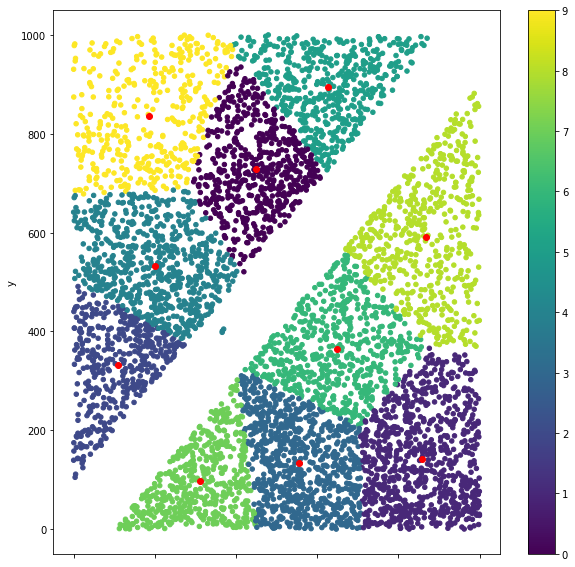

In [241]:
%%time
# With 10 clusters, the computation time is about 3x slower than with 3 clusters

kmeans = KMeans(n_clusters=10)
kmeans.fit(df2)
y_kmeans = kmeans.predict(df2)

df.plot.scatter(x='x', y='y', c=y_kmeans, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', alpha=1);



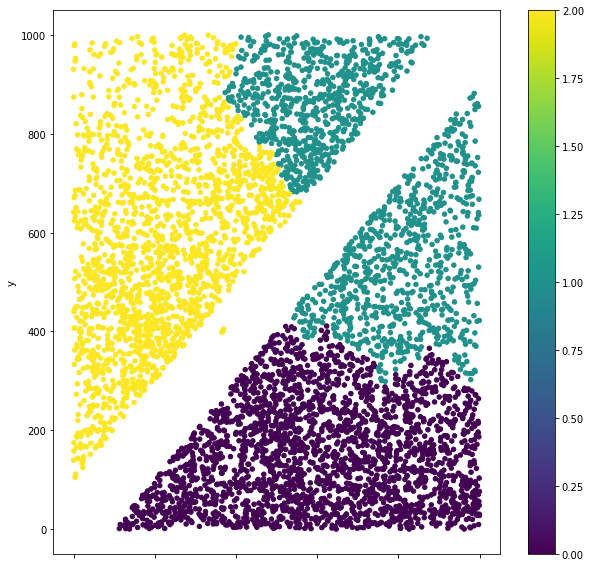

In [242]:
df3 = df[['x','y']]

cluster = AgglomerativeClustering(n_clusters=3)
cluster.fit(df3)
y_cluster = cluster.fit_predict(df3)

df.plot.scatter(x='x', y='y', c=y_cluster, cmap='viridis')

# Wasn't able to find a way to plot the depots with AgglomerativeClustering method